In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans= ["airplane",										
        "automobile",										
        "bird",										
        "cat",										
        "deer",										
        "dog",										
        "frog",										
        "horse",										
        "ship",										
        "truck"]			

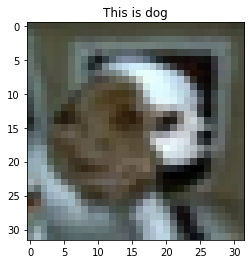

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.title("This is " + trans[y_train[c][0]])
plt.imshow(x_train[c])

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

cnn = Sequential()
# 1792 = 3 * 3(一個過濾器size) * 3(上一層特徵數目) * 64(過濾器數) + 64(bias)
cnn.add(Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
# 73856 = 3 * 3 * 64 * 128 + 128
cnn.add(Conv2D(128, 3, padding="same", activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, 3, padding="same", activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(64, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)             

In [0]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [31]:
# 資料預處理
from keras.utils.np_utils import to_categorical
x_train_norm = x_train / 255
x_test_norm = x_test / 255
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [37]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=2,
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/2
 - 9s - loss: 0.3364 - acc: 0.8826 - val_loss: 0.6954 - val_acc: 0.7872
Epoch 2/2
 - 9s - loss: 0.2939 - acc: 0.8976 - val_loss: 0.7139 - val_acc: 0.7878


In [38]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 154us/step


[0.7666139296531678, 0.7749]

In [41]:
pre = cnn.predict_classes(x_test_norm)
# (10000): List(1D)
pre

array([3, 8, 8, ..., 5, 4, 7])

In [45]:
# (10000, 1):表格(2D)
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

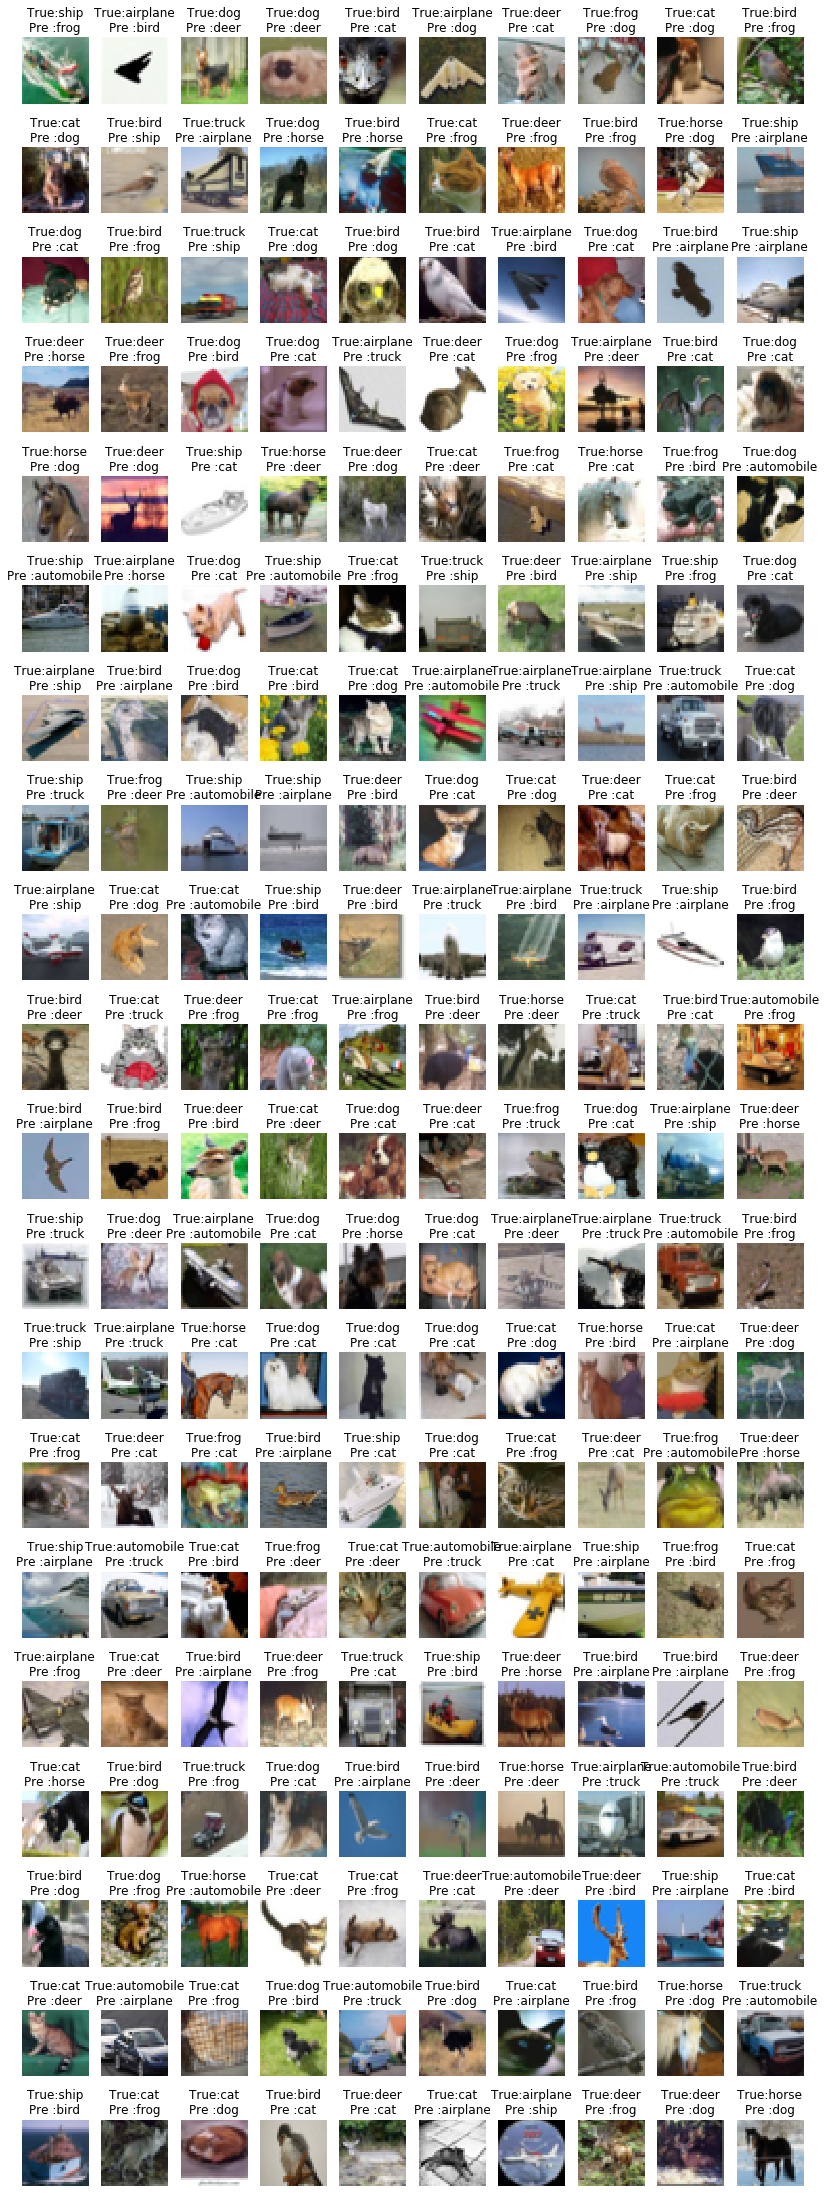

In [50]:
import numpy as np
y_test_reshape = y_test.reshape(-1)
idx = np.nonzero(y_test_reshape != pre)[0][:200]
# 預測錯誤的圖片
false_img = x_test[idx]
# 預測錯誤的正確標籤
false_true = y_test_reshape[idx]
# 預測錯誤的預測標籤
false_pre = pre[idx]
# subplot: plt.subplot(高, 寬, 第幾張)
# (2, 3, 1), (2, 3, 2), (2, 3, 3)
# (2, 3, 4), (2, 3, 5), (2, 3, 6)
plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = ("True:" + trans[false_true[i]] + "\n"
         "Pre :" + trans[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

In [53]:
import pandas as pd
from sklearn.metrics import confusion_matrix
i = [s+"(真)" for s in trans]
c = [s+"(假)" for s in trans]

pd.DataFrame(confusion_matrix(y_test_reshape, pre),
             index=i,
             columns=c)

,airplane(假),automobile(假),bird(假),cat(假),deer(假),dog(假),frog(假),horse(假),ship(假),truck(假)
airplane(真),819,11,45,11,12,5,9,11,39,38
automobile(真),16,871,2,12,2,7,7,2,6,75
bird(真),47,1,653,61,79,50,71,24,5,9
cat(真),16,5,43,577,64,180,71,23,3,18
deer(真),14,1,41,48,751,42,53,42,7,1
dog(真),10,3,29,152,47,698,22,27,4,8
frog(真),4,3,30,44,26,28,859,1,3,2
horse(真),10,1,18,24,62,55,5,820,1,4
ship(真),60,22,17,15,3,7,11,3,833,29
truck(真),17,54,10,14,1,10,4,8,14,868
